<a href="https://colab.research.google.com/github/avasquez9999/Avasquez9999/blob/main/full_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas.core.internals import managers
import requests
import pandas as pd
from bs4 import BeautifulSoup

name = []
prices= []
ratings = []
df = pd.DataFrame()

#Code for URL and checking page response
url = "https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY"
page = requests.get(url)
html = page.content
response = requests.get(url)
response

#Code for extracting the data
#We need to extract data from nested div tags. In order to
#extract the data and save it in a variable, we will locate the div tags that correspond to those class names.
soup = BeautifulSoup(response.text,"html.parser")
# main_box = soup.find_all("div",{"class":"_1YokD2 _3Mn1Gg"})
main_box = soup.find_all("div",{"class":"_2kHMtA"})

len(main_box)
box = main_box[0]
print(box)





<div class="_2kHMtA"><div class="_2tfzpE"><span>Ad</span></div><a class="_1fQZEK" href="/hp-envy-x360-creator-intel-evo-core-i5-12th-gen-16-gb-512-gb-ssd-windows-11-home-x360-bf0121tu-thin-light-laptop/p/itm4700fb37b6df3?pid=COMGH47NWT4HZFYP&amp;lid=LSTCOMGH47NWT4HZFYPJT5O1U&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=en_guFqbUwz7R6Is4eOjXEy2dPykSB2lQOSfSRWteme7dMkJDTm7nIoZQ9NDOQqaMLm%2B1qoeAqhjXdiBk6qgmk8Yw%3D%3D&amp;ppt=None&amp;ppn=None&amp;ssid=nh7uehy8xc0000001683169838953&amp;qH=c06ea84a1e3dc3c6" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="HP Envy x360 Creator Intel Evo Core i5 12th Gen - (16 GB/512 GB SSD/Windows 11 Home) x360-bf0121TU Thi..." class="_396cs4" loading="eager" src="https://rukminim1.flixcart.com/image/312/312/xif0q/computer/a/5/u/x360-bf0121tu-thin-and-light-laptop-h

In [ ]:

#creating a list to store data
data_list = []

#Finding and storing all the 24 items in the main box nested div
for b in main_box:
    t_dict = {}
    title = b.find('div',{'class':'_4rR01T'}).text.strip()
    price = b.find('div',{'class':'_30jeq3 _1_WHN1'}).text.replace('₹',' ').strip()
    rating = b.find('div',{'class':'_3LWZlK'})

    # if title is None or price is None or rating is None:
    #   t_dict ['TITLE'] = "N/A"
    #   t_dict ['PRICE'] = "N/A"
    #   t_dict ['RATING'] = "N/A"

    t_dict ['TITLE'] = b.find('div',{'class':'_4rR01T'}).text.strip()
    t_dict ['PRICE'] = b.find('div',{'class':'_30jeq3 _1_WHN1'}).text.replace('₹',' ').strip()
    if b.find('div',{'class':'_3LWZlK'}) is not None:
      t_dict ['RATING'] = b.find('div',{'class':'_3LWZlK'}).text.strip()
    else:
      t_dict['RATING'] = 'N/A'
    # print(t_dict['PRICE'])

    data_list.append(t_dict)


In [ ]:
#Creating a dataframe from the above appended data list
df = pd.DataFrame(data_list)
df

,TITLE,PRICE,RATING
0,HP Envy x360 Creator Intel Evo Core i5 12th Ge...,"83,990",4.7
1,HP Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/...,"52,990",4.2
2,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,"32,990",4.4
3,HP 14s Intel Core i3 11th Gen - (8 GB/512 GB S...,"37,490",4.3
4,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,"32,990",4.4
5,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,"43,490",4.2
6,APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...,"82,900",4.7
7,Infinix INBook X2 Plus Core i5 11th Gen - (16 ...,"38,990",4.3
8,ASUS VivoBook 14 (2021) Celeron Dual Core - (4...,"21,990",4.1
9,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,"49,990",4.3


In [ ]:
#Creating a CSV file from the data frame so that data cleaning, analysis and visualization can be done on it
df.to_csv('Laptops.csv', index = False, encoding='utf-8')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing CSV file(wrote thousands ="," to remove the  , in the price)
#sep(separator= none) if engine cannot automatically detect the separator,
#but the Python parsing engine can, meaning the latter will be used and
#automatically detect the separator by Python's builtin sniffer tool, csv.Sniffer .
laptops_df = pd.read_csv("mydata/Laptops.csv", sep = None, thousands =",", engine ='python')
laptops_df

,TITLE,PRICE,RATING
0,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,43490,4.2
1,HP Envy x360 Creator Intel Evo Core i5 12th Ge...,83990,4.7
2,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,32990,4.4
3,HP 14s Intel Core i3 11th Gen - (8 GB/512 GB S...,37490,4.3
4,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,32990,4.4
5,MSI Bravo 15 Ryzen 5 Hexa Core AMD R5-5600H - ...,49990,4.4
6,ASUS VivoBook 14 (2021) Celeron Dual Core - (4...,21990,4.1
7,ASUS Vivobook 15 Core i7 11th Gen - (16 GB/512...,52990,4.2
8,HP Laptop Core i3 11th Gen - (8 GB/512 GB SSD/...,38990,4.2
9,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,49990,4.3


In [ ]:
#Shows the dimensions of the data frame- rows and columns
laptops_df.shape

(24, 3)

In [ ]:
#Data type of DF
laptops_df.dtypes

TITLE      object
PRICE       int64
RATING    float64
dtype: object

In [ ]:
#Code to clean the data and divide it into further split the title into different
#columns to make it easier for analysis
laptops_df['MODEL'],laptops_df['spec']=laptops_df['TITLE'].str.split('-',1).str
del laptops_df['TITLE']
laptops_df.head()

<ipython-input-84-faa350e60bb5>:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  laptops_df['MODEL'],laptops_df['spec']=laptops_df['TITLE'].str.split('-',1).str
<ipython-input-84-faa350e60bb5>:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptops_df['MODEL'],laptops_df['spec']=laptops_df['TITLE'].str.split('-',1).str


,PRICE,RATING,MODEL,spec
0,43490,4.2,HP 15s Intel Core i3 12th Gen,(8 GB/512 GB SSD/Windows 11 Home) 15s-fq5007T...
1,83990,4.7,HP Envy x360 Creator Intel Evo Core i5 12th Gen,(16 GB/512 GB SSD/Windows 11 Home) x360-bf012...
2,32990,4.4,realme Book (Slim) Core i3 11th Gen,(8 GB/256 GB SSD/Windows 10 Home) RMNB1001 Th...
3,37490,4.3,HP 14s Intel Core i3 11th Gen,(8 GB/512 GB SSD/Windows 11 Home) 14s - dy250...
4,32990,4.4,realme Book (Slim) Core i3 11th Gen,(8 GB/256 GB SSD/Windows 10 Home) RMNB1001 Th...


In [ ]:
laptops_df['RAM'],laptops_df['HDD']=laptops_df['spec'].str.split('(',1).str
del laptops_df['spec']
laptops_df.head()

<ipython-input-85-f5bb9b7ec888>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  laptops_df['RAM'],laptops_df['HDD']=laptops_df['spec'].str.split('(',1).str
<ipython-input-85-f5bb9b7ec888>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptops_df['RAM'],laptops_df['HDD']=laptops_df['spec'].str.split('(',1).str


,PRICE,RATING,MODEL,RAM,HDD
0,43490,4.2,HP 15s Intel Core i3 12th Gen,,8 GB/512 GB SSD/Windows 11 Home) 15s-fq5007TU ...
1,83990,4.7,HP Envy x360 Creator Intel Evo Core i5 12th Gen,,16 GB/512 GB SSD/Windows 11 Home) x360-bf0121T...
2,32990,4.4,realme Book (Slim) Core i3 11th Gen,,8 GB/256 GB SSD/Windows 10 Home) RMNB1001 Thin...
3,37490,4.3,HP 14s Intel Core i3 11th Gen,,8 GB/512 GB SSD/Windows 11 Home) 14s - dy2508T...
4,32990,4.4,realme Book (Slim) Core i3 11th Gen,,8 GB/256 GB SSD/Windows 10 Home) RMNB1001 Thin...


In [ ]:
laptops_df['RAM'],laptops_df['Hard disk']=laptops_df['HDD'].str.split('/',1).str
del laptops_df['HDD']
laptops_df.head()

<ipython-input-86-91bb084ae13b>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  laptops_df['RAM'],laptops_df['Hard disk']=laptops_df['HDD'].str.split('/',1).str
<ipython-input-86-91bb084ae13b>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptops_df['RAM'],laptops_df['Hard disk']=laptops_df['HDD'].str.split('/',1).str


,PRICE,RATING,MODEL,RAM,Hard disk
0,43490,4.2,HP 15s Intel Core i3 12th Gen,8 GB,512 GB SSD/Windows 11 Home) 15s-fq5007TU Thin ...
1,83990,4.7,HP Envy x360 Creator Intel Evo Core i5 12th Gen,16 GB,512 GB SSD/Windows 11 Home) x360-bf0121TU Thi...
2,32990,4.4,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD/Windows 10 Home) RMNB1001 Thin and ...
3,37490,4.3,HP 14s Intel Core i3 11th Gen,8 GB,512 GB SSD/Windows 11 Home) 14s - dy2508TU Thi...
4,32990,4.4,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD/Windows 10 Home) RMNB1001 Thin and ...


In [ ]:
laptops_df['Storage'],laptops_df['Operating System']=laptops_df['Hard disk'].str.split('/',1).str
del laptops_df['Hard disk']
laptops_df.head()

<ipython-input-87-2d2127a4ba30>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  laptops_df['Storage'],laptops_df['Operating System']=laptops_df['Hard disk'].str.split('/',1).str
<ipython-input-87-2d2127a4ba30>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptops_df['Storage'],laptops_df['Operating System']=laptops_df['Hard disk'].str.split('/',1).str


,PRICE,RATING,MODEL,RAM,Storage,Operating System
0,43490,4.2,HP 15s Intel Core i3 12th Gen,8 GB,512 GB SSD,Windows 11 Home) 15s-fq5007TU Thin and Light L...
1,83990,4.7,HP Envy x360 Creator Intel Evo Core i5 12th Gen,16 GB,512 GB SSD,Windows 11 Home) x360-bf0121TU Thi...
2,32990,4.4,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home) RMNB1001 Thin and Light Laptop
3,37490,4.3,HP 14s Intel Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home) 14s - dy2508TU Thin and Light...
4,32990,4.4,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home) RMNB1001 Thin and Light Laptop


In [ ]:
laptops_df['OPERATING'],laptops_df['GRAPHIC CARD']=laptops_df['Operating System'].str.split('/',1).str
del laptops_df['Operating System']
laptops_df.head()

<ipython-input-88-927faae73c4a>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  laptops_df['OPERATING'],laptops_df['GRAPHIC CARD']=laptops_df['Operating System'].str.split('/',1).str
<ipython-input-88-927faae73c4a>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptops_df['OPERATING'],laptops_df['GRAPHIC CARD']=laptops_df['Operating System'].str.split('/',1).str


,PRICE,RATING,MODEL,RAM,Storage,OPERATING,GRAPHIC CARD
0,43490,4.2,HP 15s Intel Core i3 12th Gen,8 GB,512 GB SSD,Windows 11 Home) 15s-fq5007TU Thin and Light L...,NaN
1,83990,4.7,HP Envy x360 Creator Intel Evo Core i5 12th Gen,16 GB,512 GB SSD,Windows 11 Home) x360-bf0121TU Thi...,NaN
2,32990,4.4,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home) RMNB1001 Thin and Light Laptop,NaN
3,37490,4.3,HP 14s Intel Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home) 14s - dy2508TU Thin and Light...,NaN
4,32990,4.4,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home) RMNB1001 Thin and Light Laptop,NaN


In [ ]:
#Identifying missing values by using the isnull function
#this would let you know which value in the dataframe column is missing
#True - Missing value(Null)
#for eg. a laptop might have graphic card or rating missing if its a new product or maybe the company doesn't povide graphic cards for that model.
laptops_df.isnull()

,PRICE,RATING,MODEL,RAM,Storage,OPERATING,GRAPHIC CARD
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False


In [ ]:
#Calculate the data frame's overall missing value count.
#The amount of missing values in each column can be determined using .isnull().sum()
laptops_df.isnull().sum()

PRICE            0
RATING           1
MODEL            0
RAM              0
Storage          0
OPERATING        0
GRAPHIC CARD    20
dtype: int64

In [ ]:
#no of unique values in each column
laptops_df['MODEL'].nunique()

22

In [ ]:
laptops_df['MODEL'].value_counts()

realme Book (Slim) Core i3 11th Gen                        2
Primebook 4G Android Based MediaTek MT8788                 2
HP 15s Intel Core i3 12th Gen                              1
HP Intel Core i5 11th Gen                                  1
Infinix Y1 Plus Neo Intel Celeron Quad Core 11th Gen       1
ASUS Vivobook 15 Core i3 11th Gen                          1
Lenovo IdeaPad Ryzen 5 Hexa Core 5600H                     1
ASUS Vivobook 14 Touchscreen Intel P                       1
HP 247 G8 Athlon Dual Core AMD Athlon P3045B               1
Lenovo Intel Celeron Dual Core                             1
APPLE 2020 Macbook Air M1                                  1
Infinix INBook X2 Plus Core i5 11th Gen                    1
Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen               1
HP Envy x360 Creator Intel Evo Core i5 12th Gen            1
RedmiBook Pro Core i5 11th Gen                             1
Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen             1
HP Laptop Core i3 11th G

In [ ]:
#Descriptive data
#description contains these information for each column:
#count - The number of not-empty values.
#mean - The average (mean) value.
#std - The standard deviation.
#min - the minimum value.
#25% - The 25% percentile*.
#50% - The 50% percentile*.
#75% - The 75% percentile*.
#max - the maximum value.
laptops_df.describe()

,PRICE,RATING
count,24.000000,23.000000
mean,45048.750000,4.291304
std,28082.824135,0.175585
min,14990.000000,4.100000
25%,32240.000000,4.200000
50%,38490.000000,4.200000
75%,49990.000000,4.350000
max,149990.000000,4.700000


In [ ]:
#data cleaning(reordering indexes)
columns_titles = ["MODEL","RAM","Storage","OPERATING SYSTEM","GRAPHIC CARD","PRICE","RATING"]
clean_laptops_df =laptops_df.reindex(columns=columns_titles)

In [ ]:
clean_laptops_df

,MODEL,RAM,Storage,OPERATING SYSTEM,GRAPHIC CARD,PRICE,RATING
0,HP 15s Intel Core i3 12th Gen,8 GB,512 GB SSD,NaN,NaN,43490,4.2
1,HP Envy x360 Creator Intel Evo Core i5 12th Gen,16 GB,512 GB SSD,NaN,NaN,83990,4.7
2,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,NaN,NaN,32990,4.4
3,HP 14s Intel Core i3 11th Gen,8 GB,512 GB SSD,NaN,NaN,37490,4.3
4,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,NaN,NaN,32990,4.4
5,MSI Bravo 15 Ryzen 5 Hexa Core AMD R5,8 GB,512 GB SSD,NaN,4 GB Graphics/AMD Radeo...,49990,4.4
6,ASUS VivoBook 14 (2021) Celeron Dual Core,4 GB,256 GB SSD,NaN,NaN,21990,4.1
7,ASUS Vivobook 15 Core i7 11th Gen,16 GB,512 GB SSD,NaN,NaN,52990,4.2
8,HP Laptop Core i3 11th Gen,8 GB,512 GB SSD,NaN,NaN,38990,4.2
9,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen,8 GB,512 GB SSD,NaN,4 GB Graphics/NVIDIA...,49990,4.3


In [ ]:
#analysis to find the most affordable laptop
clean_laptops_df[clean_laptops_df.PRICE<=25000]

,MODEL,RAM,Storage,OPERATING SYSTEM,GRAPHIC CARD,PRICE,RATING
6,ASUS VivoBook 14 (2021) Celeron Dual Core,4 GB,256 GB SSD,NaN,NaN,21990,4.1
11,Primebook 4G Android Based MediaTek MT8788,4 GB,64 GB EMMC Storage,NaN,NaN,14990,4.2
15,Primebook 4G Android Based MediaTek MT8788,4 GB,128 GB EMMC Storage,NaN,NaN,17990,4.1
18,HP 247 G8 Athlon Dual Core AMD Athlon P3045B,8 GB,1 TB HDD,NaN,NaN,24490,NaN
22,Infinix Y1 Plus Neo Intel Celeron Quad Core 11...,8 GB,256 GB SSD,NaN,NaN,22990,4.2


In [ ]:
#affordable with a higher customer rating
clean_laptops_df[(clean_laptops_df['PRICE']>=30000) & (clean_laptops_df['PRICE']<=40000) & (clean_laptops_df['RATING']>=4.0)]

,MODEL,RAM,Storage,OPERATING SYSTEM,GRAPHIC CARD,PRICE,RATING
2,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,NaN,NaN,32990,4.4
3,HP 14s Intel Core i3 11th Gen,8 GB,512 GB SSD,NaN,NaN,37490,4.3
4,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,NaN,NaN,32990,4.4
8,HP Laptop Core i3 11th Gen,8 GB,512 GB SSD,NaN,NaN,38990,4.2
10,RedmiBook Pro Core i5 11th Gen,8 GB,512 GB SSD,NaN,NaN,37990,4.1
12,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen,8 GB,256 GB SSD,NaN,NaN,33990,4.2
14,Infinix INBook X2 Plus Core i5 11th Gen,16 GB,512 GB SSD,NaN,NaN,38990,4.3
21,ASUS Vivobook 15 Core i3 11th Gen,8 GB,512 GB SSD,NaN,NaN,34990,4.2


In [ ]:
#Best laptops based on rating greater than equal to 4.0 and within a medium budger of Rs. 40000-50000
clean_laptops_df[(clean_laptops_df['PRICE']>=40000) & (clean_laptops_df['PRICE']<=55000) & (clean_laptops_df['RATING']>=4.0)]

,MODEL,RAM,Storage,OPERATING SYSTEM,GRAPHIC CARD,PRICE,RATING
0,HP 15s Intel Core i3 12th Gen,8 GB,512 GB SSD,NaN,NaN,43490,4.2
5,MSI Bravo 15 Ryzen 5 Hexa Core AMD R5,8 GB,512 GB SSD,NaN,4 GB Graphics/AMD Radeo...,49990,4.4
7,ASUS Vivobook 15 Core i7 11th Gen,16 GB,512 GB SSD,NaN,NaN,52990,4.2
9,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen,8 GB,512 GB SSD,NaN,4 GB Graphics/NVIDIA...,49990,4.3
13,HP Intel Core i5 11th Gen,8 GB,512 GB SSD,NaN,NaN,51990,4.3
19,ASUS Vivobook 14 Touchscreen Intel P,8 GB,512 GB SSD,NaN,NaN,45990,4.2
20,Lenovo IdeaPad Ryzen 5 Hexa Core 5600H,8 GB,512 GB SSD,NaN,4 GB Graphics/NVIDIA GeForce...,48990,4.3


In [ ]:
#best laptops based on rating>=4.5 but with high price range
clean_laptops_df[(clean_laptops_df['PRICE']>=80000) & (clean_laptops_df['RATING']>=4.5)]

,MODEL,RAM,Storage,OPERATING SYSTEM,GRAPHIC CARD,PRICE,RATING
1,HP Envy x360 Creator Intel Evo Core i5 12th Gen,16 GB,512 GB SSD,NaN,NaN,83990,4.7
16,APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,NaN,A,82900,4.7
23,ASUS Zenbook 14X OLED Space Edition Touchscree...,32 GB,1 TB SSD,NaN,NaN,149990,4.6


In [ ]:
#Data Visualization

import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'RATING VS PRICE')

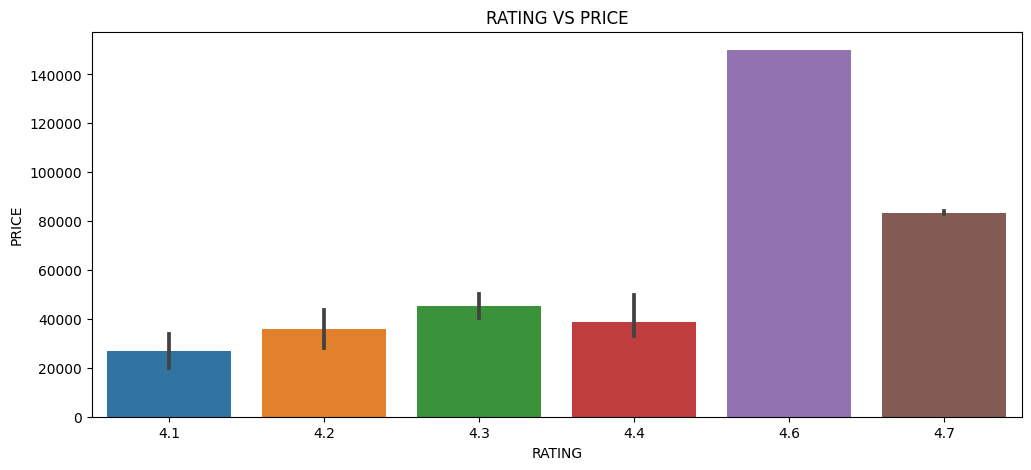

In [ ]:
#bar plot of price vs rating
plt.figure(figsize=(12,5))
sns.barplot(x=clean_laptops_df['RATING'],y=clean_laptops_df['PRICE'])
plt.title("RATING VS PRICE")

Products with higher price have higher ratings

Text(0.5, 1.0, 'Box Plot')

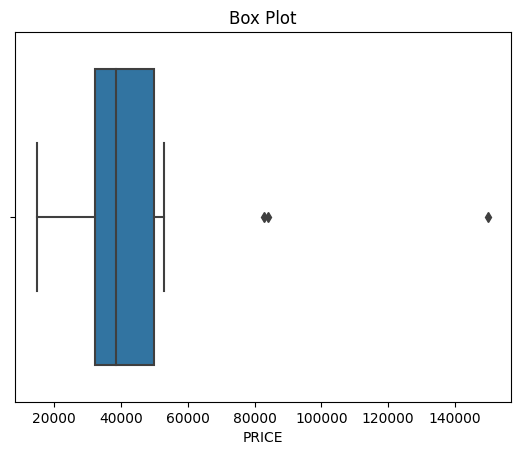

In [ ]:
sns.boxplot(x=clean_laptops_df['PRICE'])
plt.title("Box Plot")

There are 3 outliners which means that there are 3 laptops that have a higher price range.
We can conclude that there are laptops with good customer reviews in the range on 4.2-4.4 which also come in user friendly budget of Rs.38000 -
Rs.55000